In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Настройки визуализации
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
# Загрузка данных
earnings = pd.read_csv('data/coins-come.csv', 
                       parse_dates=['Дата'],
                       sep=';',
                       encoding='utf-8-sig')
purchases = pd.read_csv('data/coins-out.csv', 
                        parse_dates=['Дата оформления заказа'], 
                        sep=';',
                        encoding='utf-8-sig')
employees = pd.read_excel('data/personal-list.xlsx')

/var/folders/qf/xy929rcx1xnc19y51wt8zct00000gn/T/ipykernel_6157/2697367960.py:6: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  purchases = pd.read_csv('data/coins-out.csv',


In [5]:
lottery_keywords = ['лотерея', 'билет', 'розыгрыш']
lottery_items = purchases[
    purchases['Наименование товара']
    .str.contains('|'
                  .join(lottery_keywords), case=False, na=False)
]

lottery_items

,Дата оформления заказа,Код сотрудника,Департамент,Наименование товара,Стоимость в валюте,Скидка,Количество,Категория,Статус товара
2637,2024-07-31 09:20:00,SU196380,ДИРС.Разработка инфраструктурных продуктов.гру...,Лотерея на мерч SOFT&HARD '24,100,0,1,В стиле КРОК,закупка
2640,2024-07-31 08:28:00,SU134995,ДВА.центральная служба технической поддержки,Лотерея на мерч SOFT&HARD '24,100,0,1,В стиле КРОК,закупка
2641,2024-07-31 06:28:00,SU67226,"ДРПО.КИС.Практика ""Медицинские информационные ...",Лотерея на мерч SOFT&HARD '24,100,0,1,В стиле КРОК,закупка
2643,2024-07-31 00:46:00,SU197899,ДТК.Сервис.Первая линия,Лотерея на мерч SOFT&HARD '24,100,0,1,В стиле КРОК,закупка
2644,2024-07-31 00:17:00,SU163471,ДРПО.ГИС.цифровые экосистемы.группа разработчиков,Лотерея на мерч SOFT&HARD '24,100,0,1,В стиле КРОК,закупка
...,...,...,...,...,...,...,...,...,...
30305,2022-06-20 09:39:00,SU3228,ДТК.Сервис.группа управления сервисными проектами,"Лотерейный билет ""Надо собраться""",30,0,1,В стиле КРОК,закончился
30306,2022-06-20 09:37:00,SU57005,ДПМП.группа управления проектами по техническо...,"Лотерейный билет ""Надо собраться""",30,0,1,В стиле КРОК,закончился
30307,2022-06-20 09:36:00,SU152323,ДВА.группа разработки 1С,"Лотерейный билет ""Надо собраться""",30,0,1,В стиле КРОК,закончился
30308,2022-06-20 09:35:00,SU152323,ДВА.группа разработки 1С,"Лотерейный билет ""Надо собраться""",30,0,1,В стиле КРОК,закончился


In [9]:
# 1. Проверим названия столбцов
print("Столбцы employees:", employees.columns.tolist())
print("Столбцы purchases:", purchases.columns.tolist())

# 2. Исправим объединение (пример для разных названий)
merged_data = pd.merge(
    lottery_items,
    employees[['Внешний код', 'Факт. должность']],  # Если код называется "Внешний код"
    left_on='Код сотрудника', 
    right_on='Внешний код',
    how='left'
)

# 3. Удалим дублирующий столбец
merged_data = merged_data.drop(columns=['Внешний код'])

Столбцы employees: ['Внешний код', 'Факт. департамент', 'Факт. подразделение', 'Факт. группа', 'Факт. должность', 'Является РМ/ТЛ', 'Стаж фактический по компании', 'Пол', 'Возраст']
Столбцы purchases: ['Дата оформления заказа', 'Код сотрудника', 'Департамент', 'Наименование товара', 'Стоимость в валюте', 'Скидка', 'Количество', 'Категория', 'Статус товара']


In [15]:
merged_data.columns

Index(['Дата оформления заказа', 'Код сотрудника', 'Департамент',
       'Наименование товара', 'Стоимость в валюте', 'Скидка', 'Количество',
       'Категория', 'Статус товара', 'Факт. должность'],
      dtype='object')

/var/folders/qf/xy929rcx1xnc19y51wt8zct00000gn/T/ipykernel_6157/1831056846.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


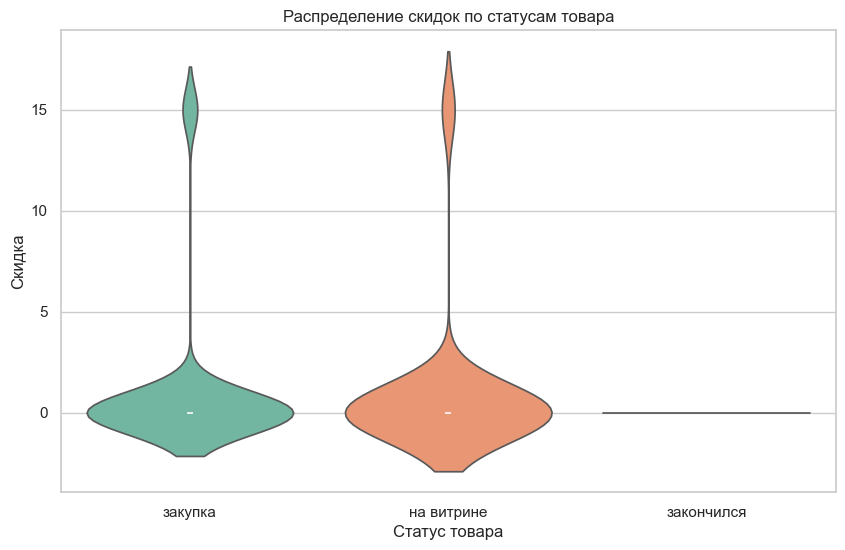

In [16]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=merged_data,
    x='Статус товара',
    y='Скидка',
    palette='Set2'
)
plt.title('Распределение скидок по статусам товара')
plt.show()

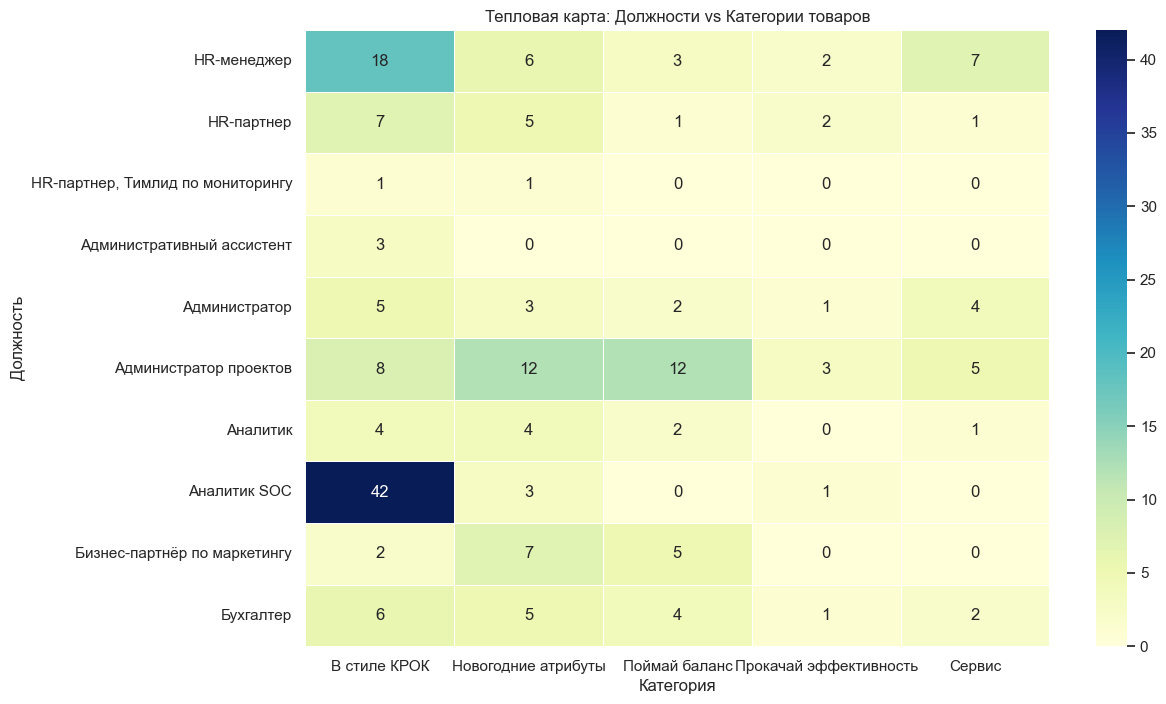

In [17]:
cross_tab = pd.crosstab(
    merged_data['Факт. должность'],
    merged_data['Категория']
).iloc[:10, :5]  # Ограничим топ-10 должностей и 5 категорий

plt.figure(figsize=(12, 8))
sns.heatmap(
    cross_tab,
    annot=True,
    fmt='d',
    cmap='YlGnBu',
    linewidths=0.5
)
plt.title('Тепловая карта: Должности vs Категории товаров')
plt.xlabel('Категория')
plt.ylabel('Должность')
plt.show()

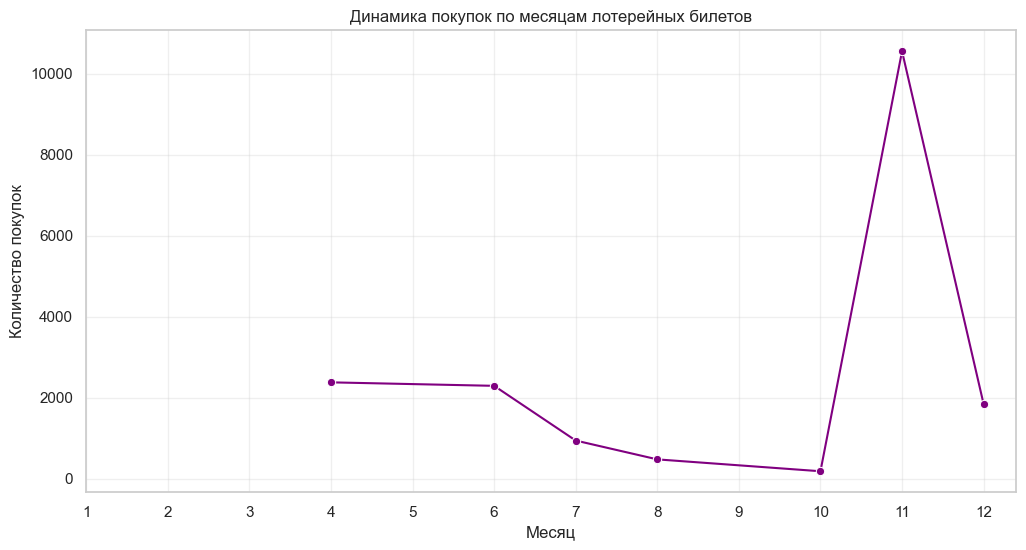

In [19]:
merged_data['Месяц'] = merged_data['Дата оформления заказа'].dt.month
monthly_sales = merged_data.groupby('Месяц')['Количество'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(
    x=monthly_sales.index,
    y=monthly_sales.values,
    marker='o',
    color='purple'
)
plt.title('Динамика покупок по месяцам лотерейных билетов')
plt.xlabel('Месяц')
plt.ylabel('Количество покупок')
plt.xticks(range(1, 13))
plt.grid(alpha=0.3)
plt.show()